# Import libraries

In [1]:
import numpy as np
import pandas as pd

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Scaling the data
from sklearn.preprocessing import StandardScaler  

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from imblearn.metrics import *
from sklearn.model_selection import *

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV

import shap

# import dataset

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data= pd.read_csv('ovarian_cancer.csv')

In [4]:
data

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,1,3.58,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.36,36.48,6.42,1.40,107.4,19.9,103.0,2.0,0.04,1.00,16.0,28.5,4.67,0.273,NaN,89.0,3.5,5.36,0.65,16.8,33.7,103.4,0,0.78,0.22,5.70,11.70,141.3,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4,0
1,2,34.24,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.62,2444.00,19.98,NaN,2.46,100.1,22.3,45.0,2.6,0.04,0.50,13.0,32.1,10.50,0.417,934.10,128.0,4.2,4.38,1.27,17.2,26.2,85.3,1,0.82,0.41,5.50,10.00,142.0,76.5,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2,0
2,3,1.50,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.08,12.18,NaN,0.77,102.6,22.2,48.0,4.7,0.03,0.60,10.0,32.5,4.64,0.391,47.56,131.0,10.1,4.30,1.10,23.7,28.4,84.6,0,1.00,0.25,5.40,11.40,138.9,69.7,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2,0
3,4,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,5.27,2.35,2555.00,18.41,131.60,0.82,103.2,24.0,65.7,2.9,0.00,0.07,17.0,26.9,4.76,0.372,853.50,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1,1.11,0.42,6.55,7.38,139.1,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6,0
4,5,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,4.89,2.48,1391.00,11.15,NaN,0.42,99.6,26.2,70.3,2.2,0.11,1.60,24.0,31.5,4.07,0.383,404.90,122.0,3.1,4.77,1.98,28.8,27.7,87.0,0,1.08,0.69,10.00,10.40,141.0,59.5,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,410,2.09,20.91,52,48.6,65.0,40.0,30.0,0.00,0.00,4.29,2.81,50.80,15.11,NaN,1.74,98.1,25.9,54.0,3.8,0.01,0.30,36.0,31.8,5.13,0.415,31.45,142.0,6.9,4.11,1.18,30.7,31.1,91.0,0,0.94,0.28,7.30,9.90,140.8,NaN,0.22,10.8,0.99,219,4.56,11.9,10.7,80.4,241.5,1
345,411,2.00,12.14,37,46.1,49.0,9.0,20.0,0.00,0.00,3.12,2.29,21.93,0.62,NaN,1.67,103.6,25.0,67.0,5.9,0.02,0.30,9.0,27.4,4.59,0.285,44.44,80.0,11.3,3.64,1.39,23.3,18.9,67.2,0,0.77,0.32,5.40,11.90,137.1,NaN,0.31,17.3,0.95,262,4.24,17.7,17.2,73.5,240.5,1
346,412,2.83,19.23,59,45.8,83.0,9.0,16.0,0.02,0.60,4.38,2.65,51.33,2.18,NaN,2.31,102.3,27.1,50.0,4.0,0.05,1.50,13.0,22.6,5.90,0.439,42.65,144.0,9.8,4.63,1.10,32.7,29.4,89.8,1,0.92,0.13,3.90,9.70,144.0,NaN,0.21,10.4,1.00,221,4.89,11.6,13.8,68.4,209.5,1
347,413,1.84,27.22,30,47.8,64.0,26.0,22.0,0.03,0.30,3.61,2.82,53.87,10.71,NaN,0.93,93.1,23.1,59.0,3.5,0.23,2.20,25.0,28.2,5.59,0.458,30.78,154.0,7.8,4.22,2.15,20.6,28.8,85.6,0,1.02,0.43,4.10,10.50,139.2,NaN,0.42,13.4,1.31,398,5.35,12.5,11.3,76.0,285.7,1


In [5]:
# dropping the ID column
data=data.drop("SUBJECT_ID",axis=1)
data

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.58,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.36,36.48,6.42,1.40,107.4,19.9,103.0,2.0,0.04,1.00,16.0,28.5,4.67,0.273,NaN,89.0,3.5,5.36,0.65,16.8,33.7,103.4,0,0.78,0.22,5.70,11.70,141.3,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4,0
1,34.24,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.62,2444.00,19.98,NaN,2.46,100.1,22.3,45.0,2.6,0.04,0.50,13.0,32.1,10.50,0.417,934.10,128.0,4.2,4.38,1.27,17.2,26.2,85.3,1,0.82,0.41,5.50,10.00,142.0,76.5,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2,0
2,1.50,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.08,12.18,NaN,0.77,102.6,22.2,48.0,4.7,0.03,0.60,10.0,32.5,4.64,0.391,47.56,131.0,10.1,4.30,1.10,23.7,28.4,84.6,0,1.00,0.25,5.40,11.40,138.9,69.7,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2,0
3,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,5.27,2.35,2555.00,18.41,131.60,0.82,103.2,24.0,65.7,2.9,0.00,0.07,17.0,26.9,4.76,0.372,853.50,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1,1.11,0.42,6.55,7.38,139.1,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6,0
4,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,4.89,2.48,1391.00,11.15,NaN,0.42,99.6,26.2,70.3,2.2,0.11,1.60,24.0,31.5,4.07,0.383,404.90,122.0,3.1,4.77,1.98,28.8,27.7,87.0,0,1.08,0.69,10.00,10.40,141.0,59.5,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2.09,20.91,52,48.6,65.0,40.0,30.0,0.00,0.00,4.29,2.81,50.80,15.11,NaN,1.74,98.1,25.9,54.0,3.8,0.01,0.30,36.0,31.8,5.13,0.415,31.45,142.0,6.9,4.11,1.18,30.7,31.1,91.0,0,0.94,0.28,7.30,9.90,140.8,NaN,0.22,10.8,0.99,219,4.56,11.9,10.7,80.4,241.5,1
345,2.00,12.14,37,46.1,49.0,9.0,20.0,0.00,0.00,3.12,2.29,21.93,0.62,NaN,1.67,103.6,25.0,67.0,5.9,0.02,0.30,9.0,27.4,4.59,0.285,44.44,80.0,11.3,3.64,1.39,23.3,18.9,67.2,0,0.77,0.32,5.40,11.90,137.1,NaN,0.31,17.3,0.95,262,4.24,17.7,17.2,73.5,240.5,1
346,2.83,19.23,59,45.8,83.0,9.0,16.0,0.02,0.60,4.38,2.65,51.33,2.18,NaN,2.31,102.3,27.1,50.0,4.0,0.05,1.50,13.0,22.6,5.90,0.439,42.65,144.0,9.8,4.63,1.10,32.7,29.4,89.8,1,0.92,0.13,3.90,9.70,144.0,NaN,0.21,10.4,1.00,221,4.89,11.6,13.8,68.4,209.5,1
347,1.84,27.22,30,47.8,64.0,26.0,22.0,0.03,0.30,3.61,2.82,53.87,10.71,NaN,0.93,93.1,23.1,59.0,3.5,0.23,2.20,25.0,28.2,5.59,0.458,30.78,154.0,7.8,4.22,2.15,20.6,28.8,85.6,0,1.02,0.43,4.10,10.50,139.2,NaN,0.42,13.4,1.31,398,5.35,12.5,11.3,76.0,285.7,1


In [7]:
imp = IterativeImputer(max_iter=15, random_state=0)
data_mice=imp.fit_transform(data)
data_mice=pd.DataFrame(data_mice)
data_mice.columns=data.columns

data_mice

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.58,19.36,47.0,45.4,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.36,36.48,6.420000,1.40,107.4,19.9,103.0,2.0,0.04,1.00,16.0,28.5,4.67,0.273,259.663062,89.0,3.5,5.36,0.65,16.8,33.7,103.4,0.0,0.78,0.22,5.70,11.70,141.3,76.200000,0.09,13.4,1.46,74.0,2.64,13.7,5.5,73.9,396.4,0.0
1,34.24,23.98,61.0,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.62,2444.00,19.98,44.273485,2.46,100.1,22.3,45.0,2.6,0.04,0.50,13.0,32.1,10.50,0.417,934.100000,128.0,4.2,4.38,1.27,17.2,26.2,85.3,1.0,0.82,0.41,5.50,10.00,142.0,76.500000,0.30,11.2,1.09,304.0,4.89,12.7,6.8,72.0,119.2,0.0
2,1.50,18.40,39.0,45.4,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.08,12.18,5.205010,0.77,102.6,22.2,48.0,4.7,0.03,0.60,10.0,32.5,4.64,0.391,47.560000,131.0,10.1,4.30,1.10,23.7,28.4,84.6,0.0,1.00,0.25,5.40,11.40,138.9,69.700000,0.13,15.2,0.97,112.0,4.62,12.0,14.8,77.9,209.2,0.0
3,2.75,16.60,45.0,39.2,26.0,16.0,17.0,0.05,0.74,5.27,2.35,2555.00,18.41,131.600000,0.82,103.2,24.0,65.7,2.9,0.00,0.07,17.0,26.9,4.76,0.372,853.500000,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1.0,1.11,0.42,6.55,7.38,139.1,65.500000,0.25,17.4,1.25,339.0,4.01,14.6,10.9,66.1,215.6,0.0
4,2.36,19.97,45.0,35.0,47.0,21.0,27.0,0.01,0.10,4.89,2.48,1391.00,11.15,26.758954,0.42,99.6,26.2,70.3,2.2,0.11,1.60,24.0,31.5,4.07,0.383,404.900000,122.0,3.1,4.77,1.98,28.8,27.7,87.0,0.0,1.08,0.69,10.00,10.40,141.0,59.500000,0.28,11.9,0.94,272.0,4.40,13.4,5.3,66.5,206.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2.09,20.91,52.0,48.6,65.0,40.0,30.0,0.00,0.00,4.29,2.81,50.80,15.11,4.435316,1.74,98.1,25.9,54.0,3.8,0.01,0.30,36.0,31.8,5.13,0.415,31.450000,142.0,6.9,4.11,1.18,30.7,31.1,91.0,0.0,0.94,0.28,7.30,9.90,140.8,61.703680,0.22,10.8,0.99,219.0,4.56,11.9,10.7,80.4,241.5,1.0
345,2.00,12.14,37.0,46.1,49.0,9.0,20.0,0.00,0.00,3.12,2.29,21.93,0.62,3.688458,1.67,103.6,25.0,67.0,5.9,0.02,0.30,9.0,27.4,4.59,0.285,44.440000,80.0,11.3,3.64,1.39,23.3,18.9,67.2,0.0,0.77,0.32,5.40,11.90,137.1,70.985385,0.31,17.3,0.95,262.0,4.24,17.7,17.2,73.5,240.5,1.0
346,2.83,19.23,59.0,45.8,83.0,9.0,16.0,0.02,0.60,4.38,2.65,51.33,2.18,4.478130,2.31,102.3,27.1,50.0,4.0,0.05,1.50,13.0,22.6,5.90,0.439,42.650000,144.0,9.8,4.63,1.10,32.7,29.4,89.8,1.0,0.92,0.13,3.90,9.70,144.0,61.301388,0.21,10.4,1.00,221.0,4.89,11.6,13.8,68.4,209.5,1.0
347,1.84,27.22,30.0,47.8,64.0,26.0,22.0,0.03,0.30,3.61,2.82,53.87,10.71,3.454727,0.93,93.1,23.1,59.0,3.5,0.23,2.20,25.0,28.2,5.59,0.458,30.780000,154.0,7.8,4.22,2.15,20.6,28.8,85.6,0.0,1.02,0.43,4.10,10.50,139.2,72.796501,0.42,13.4,1.31,398.0,5.35,12.5,11.3,76.0,285.7,1.0


In [8]:
data=data_mice

In [11]:
x= data.drop("TYPE",axis=1)
y= data["TYPE"]

# Model define

In [9]:
knn= KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
svm= SVC(random_state=10,kernel='rbf')
lr = LogisticRegression()

rf= RandomForestClassifier(n_jobs=-1,random_state=10)
ada= AdaBoostClassifier(random_state=100)

lgbm = LGBMClassifier(n_jobs=-1,random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier(use_label_encoder =False, eval_metric='logloss')

In [10]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),
        'roc': make_scorer(roc_auc_score),
        'precision': make_scorer(precision_score),
        'mcc':  make_scorer(matthews_corrcoef)
        }

In [24]:
# Split the data into train and test data:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [44]:
rf.fit(x,y)

RandomForestClassifier(n_jobs=-1, random_state=10)

# SHAP with all features

In [45]:
shap_values = shap.TreeExplainer(rf).shap_values(x)

# summary plot

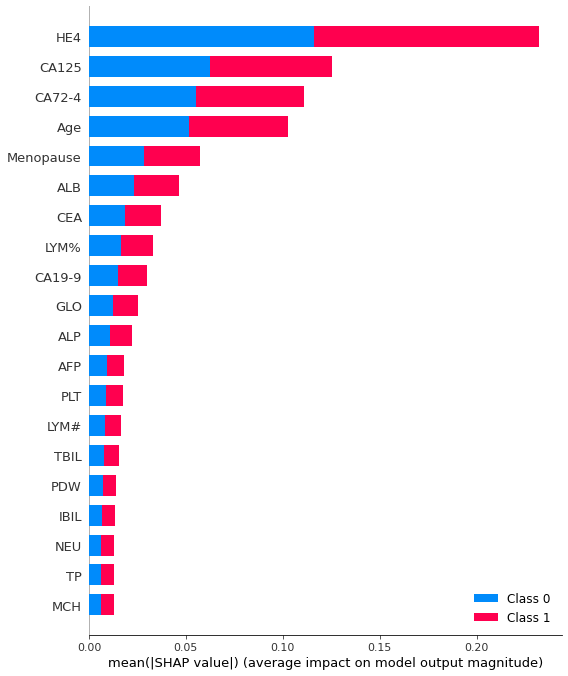

In [46]:
shap.summary_plot(shap_values, x, plot_type="bar")

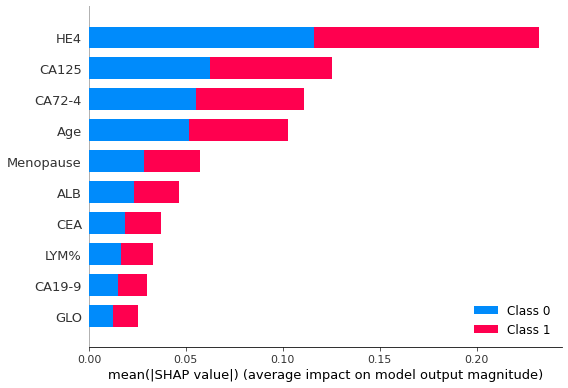

In [47]:
shap.summary_plot(shap_values, x, plot_type="bar", max_display = 10)

In [48]:
shap.summary_plot(shap_values, x, plot_type='dot')

AssertionError: Only plot_type = 'bar' is supported for multi-output explanations!

In [55]:
shap_values

[array([[ 6.67599846e-03,  4.84011726e-05,  3.03730426e-02, ...,
          2.58870986e-02, -1.48091808e-04, -7.64115469e-04],
        [ 2.06000824e-02, -4.84247878e-04,  5.96037134e-02, ...,
          3.26596452e-04, -2.59058697e-04, -2.39528196e-03],
        [-6.85296636e-04,  2.88107679e-03, -2.94498498e-02, ...,
         -5.51453070e-03,  6.53060796e-03,  1.50398271e-03],
        ...,
        [-2.05435260e-03,  3.72519513e-04,  5.97737218e-02, ...,
         -1.45018503e-02, -6.19307423e-03,  2.88197507e-04],
        [-4.51175502e-03, -3.25105609e-03, -7.04439800e-02, ...,
         -8.60217082e-03, -3.79706810e-03, -1.47172205e-03],
        [-7.65310571e-03, -3.16148444e-03, -5.59542748e-02, ...,
         -3.69028046e-03, -6.38633618e-03,  2.45809396e-03]]),
 array([[-6.67599846e-03, -4.84011726e-05, -3.03730426e-02, ...,
         -2.58870986e-02,  1.48091808e-04,  7.64115469e-04],
        [-2.06000824e-02,  4.84247878e-04, -5.96037134e-02, ...,
         -3.26596452e-04,  2.59058697e

# Bar plot

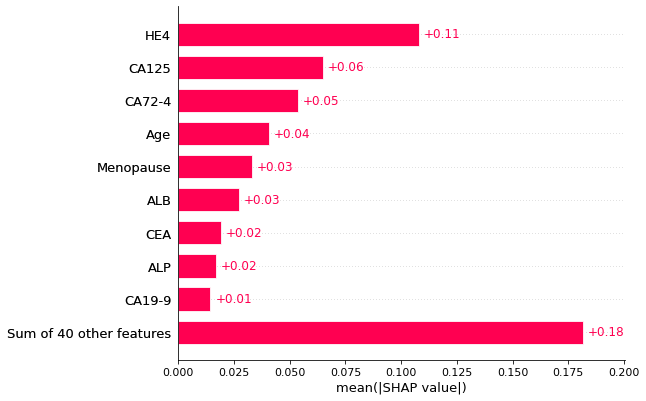

In [35]:
explainer = shap.Explainer(rf)
shap_values_bar = explainer(x_test)
shap.plots.bar(shap_values_bar[:,:,1])

In [34]:
shap_values_bar.shape

(88, 49, 2)

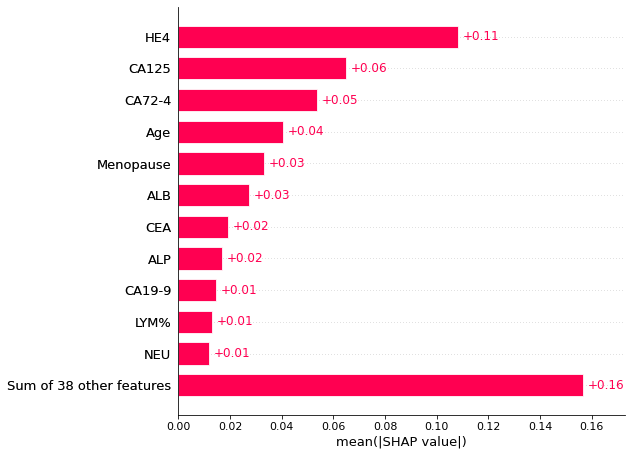

In [36]:
explainer = shap.Explainer(rf)
shap_values_bar = explainer(x_test)
shap.plots.bar(shap_values_bar[:,:,1],max_display=12)

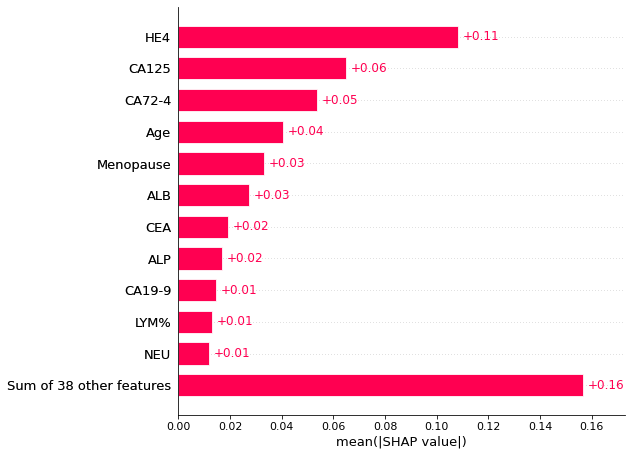

In [37]:
explainer = shap.Explainer(rf)
shap_values_bar = explainer(x_test)
shap.plots.bar(shap_values_bar[:,:,1],max_display=12)

# dependence plot

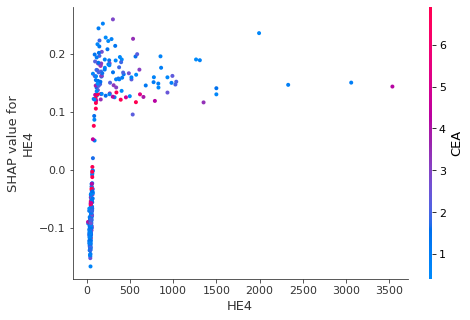

In [50]:
shap.dependence_plot('HE4',shap_values[0],x)

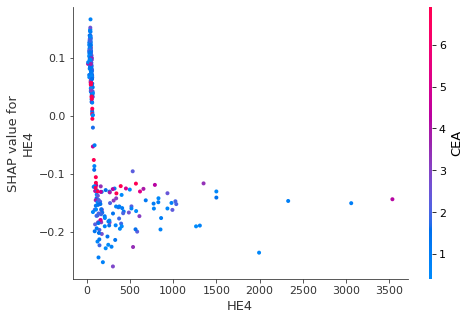

In [56]:
shap.dependence_plot('HE4',shap_values[1],x)

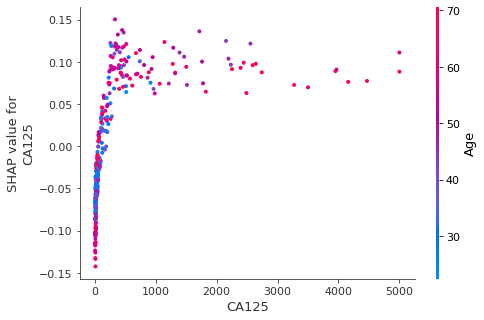

In [57]:
shap.dependence_plot('CA125',shap_values[0],x)

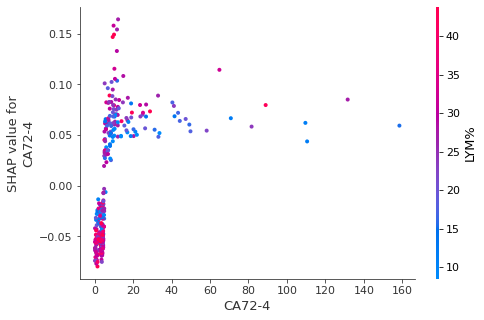

In [60]:
shap.dependence_plot('CA72-4',shap_values[0],x)

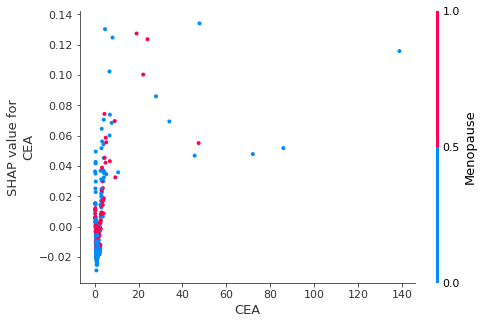

In [61]:
shap.dependence_plot('CEA',shap_values[0],x)

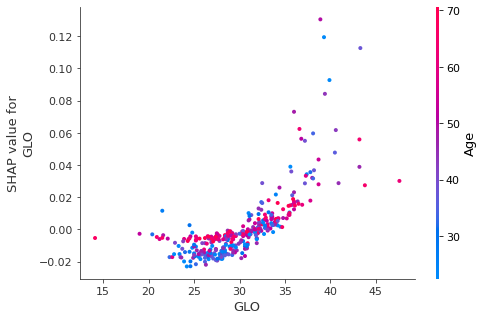

In [62]:
shap.dependence_plot('GLO',shap_values[0],x)

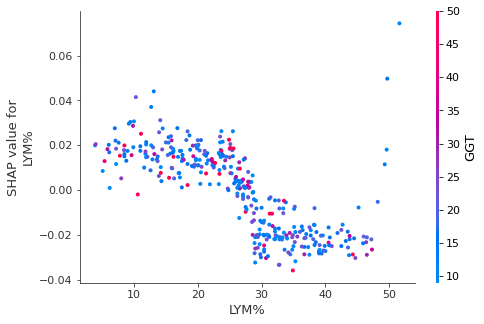

In [63]:
shap.dependence_plot('LYM%',shap_values[0],x)

# Heatmap

In [69]:
explainer = shap.Explainer(rf, x)
shap_values = explainer(x[:100],check_additivity=False)

In [70]:
shap_values

.values =
array([[[ 0.00989952, -0.00989952],
        [ 0.00021024, -0.00021024],
        [ 0.03335198, -0.03335198],
        ...,
        [ 0.02285131, -0.02285131],
        [ 0.00171048, -0.00171048],
        [-0.00080024,  0.00080024]],

       [[ 0.02259881, -0.02259881],
        [-0.00012857,  0.00012857],
        [ 0.05802928, -0.05802929],
        ...,
        [ 0.00107929, -0.00107929],
        [ 0.00064984, -0.00064984],
        [-0.00268024,  0.00268024]],

       [[-0.00041127,  0.00041127],
        [ 0.00311373, -0.00311373],
        [-0.0175325 ,  0.0175325 ],
        ...,
        [-0.00877952,  0.00877952],
        [ 0.00722925, -0.00722925],
        [ 0.00155111, -0.00155111]],

       ...,

       [[-0.02822821,  0.02822821],
        [ 0.000415  , -0.000415  ],
        [ 0.06142976, -0.06142976],
        ...,
        [ 0.00270929, -0.00270929],
        [ 0.00099524, -0.00099524],
        [ 0.00173524, -0.00173524]],

       [[ 0.00154476, -0.00154476],
        [ 0.00161

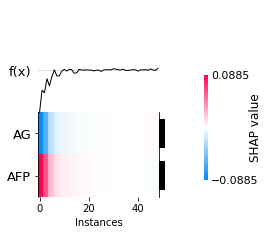

In [73]:
shap.plots.heatmap(shap_values[1])

# waterfall

In [76]:
shap_values = shap.TreeExplainer(rf).shap_values(x)

In [78]:
shap_values

[array([[ 6.67599846e-03,  4.84011726e-05,  3.03730426e-02, ...,
          2.58870986e-02, -1.48091808e-04, -7.64115469e-04],
        [ 2.06000824e-02, -4.84247878e-04,  5.96037134e-02, ...,
          3.26596452e-04, -2.59058697e-04, -2.39528196e-03],
        [-6.85296636e-04,  2.88107679e-03, -2.94498498e-02, ...,
         -5.51453070e-03,  6.53060796e-03,  1.50398271e-03],
        ...,
        [-2.05435260e-03,  3.72519513e-04,  5.97737218e-02, ...,
         -1.45018503e-02, -6.19307423e-03,  2.88197507e-04],
        [-4.51175502e-03, -3.25105609e-03, -7.04439800e-02, ...,
         -8.60217082e-03, -3.79706810e-03, -1.47172205e-03],
        [-7.65310571e-03, -3.16148444e-03, -5.59542748e-02, ...,
         -3.69028046e-03, -6.38633618e-03,  2.45809396e-03]]),
 array([[-6.67599846e-03, -4.84011726e-05, -3.03730426e-02, ...,
         -2.58870986e-02,  1.48091808e-04,  7.64115469e-04],
        [-2.06000824e-02,  4.84247878e-04, -5.96037134e-02, ...,
         -3.26596452e-04,  2.59058697e

In [77]:
shap.plots.waterfall(shap_values[0])

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

# Force plot

In [79]:
x_test

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
14,4.34,24.98,60.0,32.8,70.0,35.0,41.0,0.04,0.48,5.64,2.22,3499.00,424.00,17.010000,2.00,95.0,21.6,66.2,1.7,0.03,0.31,17.0,27.8,5.03,0.320,1026.00,106.0,3.3,4.78,0.53,6.13,31.4,94.7,1.0,1.05,0.47,5.43,9.94,136.8,87.700000,0.223,20.2,1.02,224.0,3.38,12.6,5.0,60.6,215.8
306,1.55,18.71,26.0,48.0,80.0,13.0,20.0,0.05,1.30,3.03,2.67,8.65,13.85,3.909403,1.33,97.8,26.7,56.0,5.4,0.07,1.90,11.0,25.2,4.74,0.459,38.88,155.0,8.8,3.91,1.44,38.20,30.6,90.7,0.0,1.00,0.19,5.00,11.20,139.3,53.615450,0.210,13.7,1.15,191.0,5.06,11.9,14.2,73.2,269.6
160,1.89,17.98,39.0,39.5,74.0,25.0,17.0,0.12,1.94,3.95,2.61,43.23,25.52,0.200000,1.47,102.0,24.7,72.1,1.7,0.18,2.91,15.0,31.9,5.17,0.372,42.99,123.0,2.8,4.18,1.49,24.80,28.4,86.2,0.0,0.91,0.32,5.26,7.85,140.5,65.100000,0.194,18.4,0.82,247.0,4.31,14.0,4.5,71.4,228.6
49,2.02,23.70,47.0,49.0,75.0,8.0,17.0,0.00,0.00,3.63,2.80,2193.00,170.60,41.212507,1.90,100.6,24.4,63.0,5.6,0.01,0.20,12.0,31.3,4.69,0.414,166.20,119.0,8.8,4.30,0.99,23.60,24.8,86.3,0.0,0.94,0.15,3.60,11.00,144.4,72.600000,0.320,12.1,1.19,292.0,4.80,16.1,14.4,80.3,239.2
335,1.20,20.40,46.0,43.1,68.0,7.0,8.0,0.05,0.40,3.88,2.59,42.78,0.60,3.883678,1.19,102.5,21.8,56.0,2.0,0.05,0.40,11.0,31.9,5.61,0.403,48.43,134.0,3.4,4.30,1.41,11.90,30.2,90.8,0.0,0.92,0.45,3.80,10.70,140.4,83.500068,0.320,13.1,1.06,302.0,4.44,12.8,5.4,75.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,1.01,19.31,30.0,42.4,39.0,16.0,13.0,0.04,0.58,3.24,2.43,19.29,17.73,0.200000,0.80,101.9,22.6,66.0,2.8,0.04,0.58,12.0,30.8,5.55,0.353,39.03,117.0,5.7,4.51,1.98,32.10,30.5,91.5,0.0,0.90,0.46,7.52,7.12,139.3,59.200000,0.230,16.2,0.91,323.0,3.85,14.3,8.5,73.2,153.4
300,3.49,22.27,26.0,48.9,59.0,25.0,19.0,0.01,0.20,3.63,2.66,20.87,38.74,4.224328,2.02,100.4,23.0,59.0,3.5,0.07,1.50,10.0,28.1,5.16,0.401,34.92,139.0,7.4,4.67,1.21,26.20,32.1,92.6,0.0,0.98,0.19,4.10,9.80,141.0,68.002735,0.180,11.9,1.23,185.0,4.33,12.4,10.9,77.0,230.2
59,2.60,19.82,50.0,34.2,63.0,15.0,18.0,0.04,0.50,4.29,2.35,21.95,85.09,4.321226,0.71,102.4,21.6,50.1,2.7,0.03,0.40,17.0,38.9,4.80,0.395,55.76,131.0,7.6,4.32,3.05,41.90,29.6,89.4,0.0,1.24,0.51,7.00,12.90,139.5,50.200000,0.260,17.4,1.07,199.0,4.42,14.0,10.3,73.1,192.7
220,5.27,15.51,36.0,48.4,41.0,12.0,11.0,0.02,0.94,3.89,2.57,113.00,22.94,2.030000,0.83,101.9,25.2,63.1,3.5,0.02,0.84,17.0,28.3,5.56,0.367,39.15,126.0,5.4,4.21,0.97,43.80,31.0,90.0,0.0,1.04,0.15,6.68,8.79,138.4,47.800000,0.130,18.2,1.16,148.0,4.08,14.8,8.9,76.7,209.4


In [82]:
y_test

14     0.0
306    1.0
160    1.0
49     0.0
335    1.0
      ... 
225    1.0
300    1.0
59     0.0
220    1.0
226    1.0
Name: TYPE, Length: 88, dtype: float64

In [81]:
# Calculate Shap values
choosen_instance = x_test.loc[[14]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [83]:
# Calculate Shap values
choosen_instance = x_test.loc[[306]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [84]:
# Calculate Shap values
choosen_instance = x_test.loc[[160]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)